In [1]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Data Analyst jobs
job_title = 'Data Analyst'
df_da = df[df['job_title_short'] == job_title].copy()

c:\Users\ITZJA\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
top_skills = 5
df_da['job_posted_month'] = df_da['job_posted_date'].dt.month
df_da_explode = df_da.explode('job_skills')
df_da_pivot = df_da_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_da_pivot.loc['total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('total')

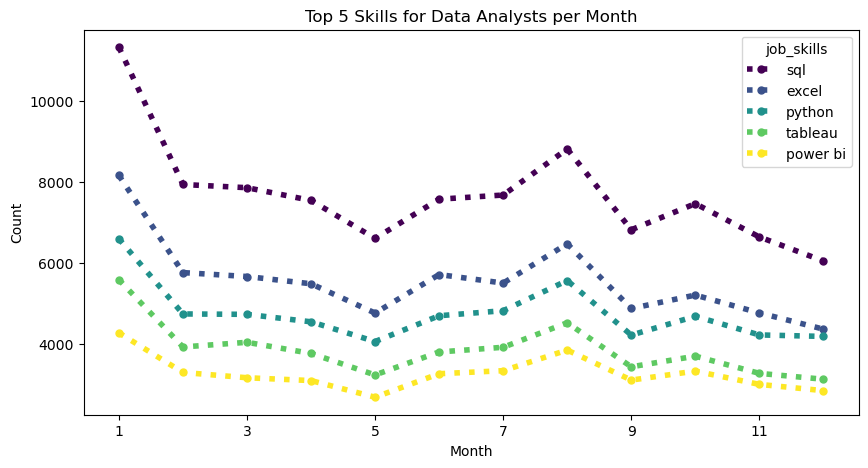

In [6]:
df_da_pivot.iloc[:, :top_skills].plot(
    kind='line',
    linewidth=4,
    linestyle=':', #options: '-', '--', '-.', ':'
    colormap='viridis', #options on cheatsheets
    marker='o', #options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4' ...
    markersize=5,
    figsize=(10, 5) #(Width, Height)
)
plt.title(f'Top {top_skills} Skills for {job_title}s per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [10]:
from adjustText import adjust_text
df_exploded =df_da.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)
skill_num = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_num)

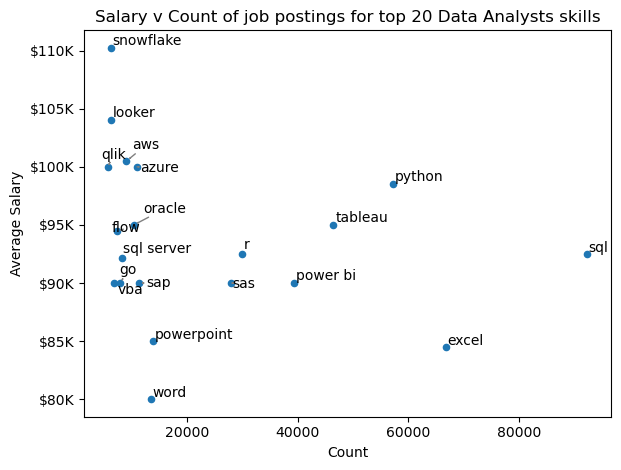

In [17]:


skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title(f'Salary v Count of job postings for top {skill_num} {job_title}s skills')
plt.xlabel('Count')
plt.ylabel('Average Salary')
plt.tight_layout()
texts = []
for i ,txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=1))
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()